In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("./senval.csv")
df

,SenKey,AddDt,CRRMngKey,SSO,FSR,LIG,HAL,VIB
0,374373,2021-06-21 16:38:30,H001236001,25.81,155,115,1,0
1,374371,2021-06-21 16:38:30,H001236001,25.70,159,117,1,0
2,374369,2021-06-21 16:38:29,H001236001,25.82,156,114,1,0
3,374367,2021-06-21 16:38:29,H001236001,25.70,159,115,1,0
4,374365,2021-06-21 16:38:28,H001236001,25.82,161,119,1,0
...,...,...,...,...,...,...,...,...
5373,363624,2021-05-28 09:32:23,H001236001,25.72,143,85,0,0
5374,363622,2021-05-28 09:32:22,H001236001,25.62,144,86,0,0
5375,363620,2021-05-28 09:32:22,H001236001,25.62,144,85,0,0
5376,363618,2021-05-28 09:32:21,H001236001,25.72,144,85,0,0


## 센서값 정규화

- 진동센서는 제거

In [3]:
index = 1100
sensor_df = df.iloc[index:index+70, [1, 3, 4, 5, 6]].set_index("AddDt")
normalization_df = (sensor_df - sensor_df.mean())/sensor_df.std()
normalization_df.head()

,SSO,FSR,LIG,HAL
AddDt,,,,
2021-05-28 10:33:53,1.205516,-1.090805,-0.526575,-0.540429
2021-05-28 10:33:53,1.262887,-1.090805,-0.522171,-0.540429
2021-05-28 10:33:52,1.196262,-1.090805,-0.522171,-0.540429
2021-05-28 10:33:50,1.205516,-1.090805,-0.522171,-0.540429
2021-05-28 10:33:50,1.196262,-1.103247,-0.517767,-0.540429


## 정규화 후 산점도

- 자신의 경우에는 빈도수를 나타내는 그래프가 보여짐

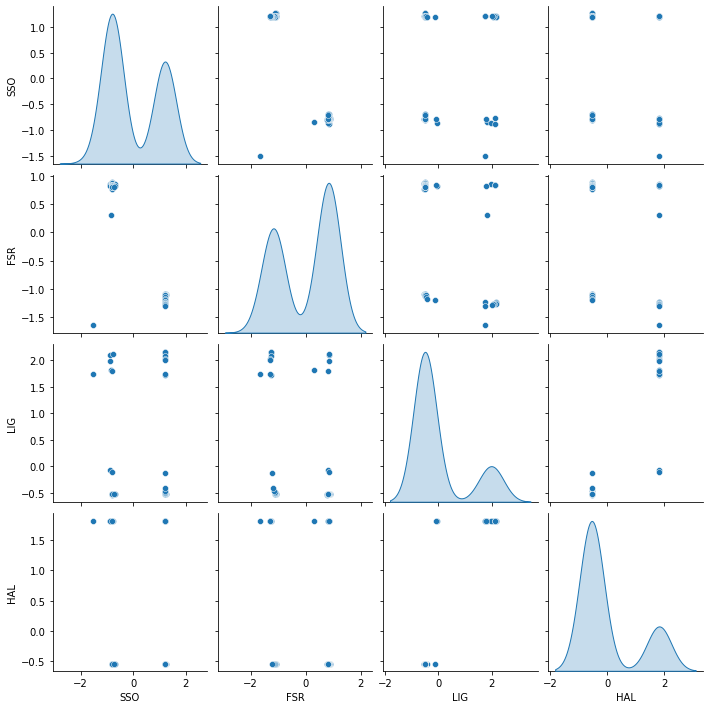

In [4]:
sns.pairplot(normalization_df, diag_kind="kde")

딱히 상관관계가 보이지 않음.
일단 새로운 데이터셋인 `senval_new.csv`를 가지고 다시 시작

In [5]:
new_dataset = pd.read_csv("./senval_new.csv")
new_dataset

,SenKey,AddDt,CRRMngKey,SSO,FSR,LIG,HAL,VIB
0,400342,2021-07-16 17:12:11,H001238001,25.64,168,123,1,0
1,400340,2021-07-16 17:12:11,H001238001,25.74,168,123,1,0
2,400338,2021-07-16 17:12:10,H001238001,25.74,169,124,1,0
3,400336,2021-07-16 17:12:09,H001238001,25.64,169,124,1,0
4,400334,2021-07-16 17:12:09,H001238001,25.74,168,123,1,0
...,...,...,...,...,...,...,...,...
12898,374545,2021-07-16 15:03:21,H001238001,25.74,168,121,1,0
12899,374543,2021-07-16 15:03:21,H001238001,25.64,169,121,1,0
12900,374541,2021-07-16 15:03:20,H001238001,25.75,168,120,1,0
12901,374539,2021-07-16 15:03:19,H001238001,25.65,168,120,1,0


<AxesSubplot:>

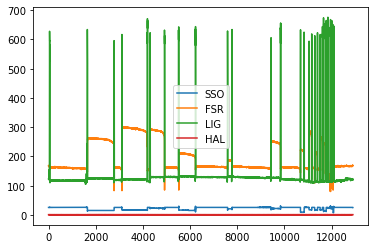

In [6]:
sensor_df = new_dataset.iloc[:, [3, 4, 5, 6]]
sensor_df.plot()


<AxesSubplot:>

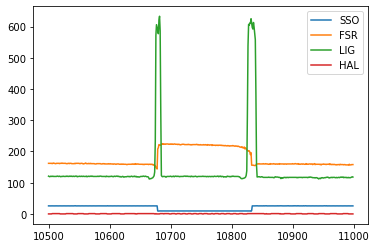

In [7]:
sensor_df.iloc[10500:11000, :].plot()

<AxesSubplot:>

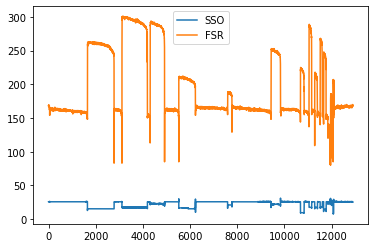

In [8]:
sensor_df.iloc[:, [0, 1]].plot()

## 데이터 차이 추출
- 각 센서의 이전 값 차를 이용하여 큰 폭으로 작아지거나 커지는 값을 추출

In [9]:
new = pd.DataFrame([(0, 0, 0, 0)], columns=["SSO", "FSR", "LIG", "HAL"])
new = new.append(sensor_df.copy(), ignore_index=True)
sensor_df = sensor_df.append(pd.DataFrame([(0, 0, 0, 0)], columns=[
                 "SSO", "FSR", "LIG", "HAL"]), ignore_index=True)


<AxesSubplot:>

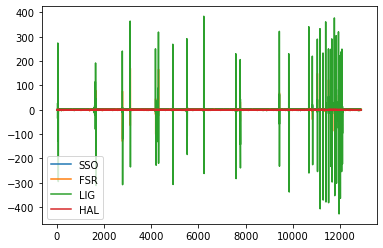

In [10]:
difference_df = (sensor_df-new).iloc[1:-1, :]
difference_df.plot()

### 초음파센서와 압력센서의 차이를 살펴보자

- 아래의 그래프로 보아 거의 동시에 값이 반비례한다.

<AxesSubplot:>

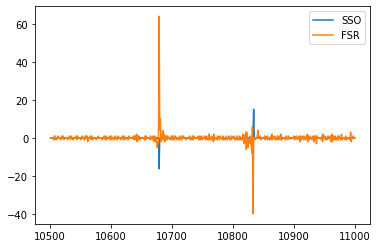

In [11]:
difference_df.iloc[10500:11000, :2].plot()

### 조도센서와 초음파+압력센서 간 차이를 살펴보자

<AxesSubplot:>

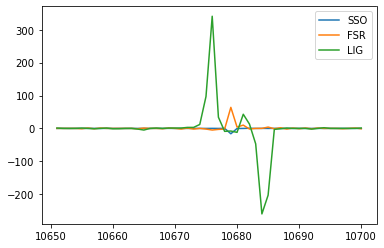

In [12]:
difference_df.iloc[10650:10700, :3].plot()

<AxesSubplot:>

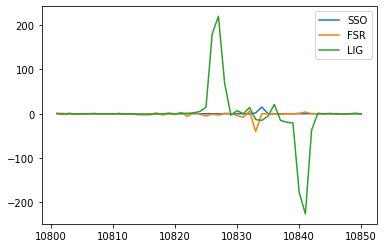

In [13]:
difference_df.iloc[10800:10850, :3].plot()


### 결과

- 조도센서가 순간 증가한 뒤에 압력센서와 초음파센서가 변동되는 것을 볼 수 있으며 조도센서의 값이 낮아지면 그 뒤로는 값의 변동이 없다.

- 각 조도센서는 순간 증가폭이 최소 150 이상이다.

In [14]:
open_list = difference_df.index[difference_df["LIG"] > 150].to_numpy()
closed_list = difference_df.index[difference_df["LIG"] < -150].to_numpy()
open_list, closed_list

(array([   38,    41,  1639,  2773,  2774,  3105,  4178,  4305,  4912,
         4913,  5507,  6225,  7583,  7584,  7770,  7771,  9429,  9827,
         9828, 10676, 10826, 10827, 11039, 11151, 11279, 11280, 11393,
        11511, 11512, 11600, 11601, 11650, 11761, 11838, 11935, 12004,
        12005, 12048, 12049, 12082, 12083]),
 array([   60,  1654,  2785,  3117,  4206,  4207,  4310,  4924,  5524,
         5525,  6238,  7596,  7780,  9434,  9849, 10684, 10685, 10840,
        10841, 11046, 11047, 11160, 11286, 11406, 11517, 11614, 11615,
        11666, 11667, 11778, 11852, 11853, 11960, 12016, 12070, 12071,
        12102, 12103]))

두 자릿수 인덱스는 세팅 중 오류로 발생한 결과물이므로 제거하여 테스트를 진행
각 인덱스 값이 차이가 안나는 경우는 제거

In [22]:
open_list = open_list[2:]
closed_list = closed_list[1:]
for i in range(open_list.size-1):
    # 10으로 비교하는 것은 넉넉잡은 값
    # 조도센서의 값차가 100이상 나는 인덱스가 연속으로 존재하지, 띄엄띄엄 나타나는 것은 데이터가 잘못 된 것임
    if open_list[i+1] - open_list[i] < 10:
        open_list[i+1] = open_list[i]

for i in range(closed_list.size-1):
    if closed_list[i+1] - closed_list[i] < 10:
        closed_list[i+1] = closed_list[i]

open_list = sorted(list(set(open_list)))
closed_list = sorted(list(set(closed_list)))


## 테스트 시도

SSO    0.297500
FSR   -1.416667
dtype: float64

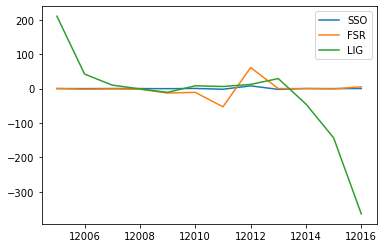

In [45]:
start, end = open_list[-3], closed_list[-3]
difference_df.iloc[start:end, :3].plot()
difference_df.iloc[start:end, :2].mean()

SSO   -0.353077
FSR    2.384615
dtype: float64

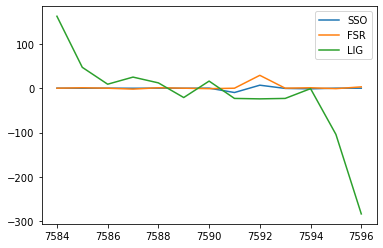

In [48]:
difference_df.iloc[7583:7596, :3].plot()
difference_df.iloc[7583:7596, :2].mean()


SSO    0.846667
FSR   -6.250000
dtype: float64

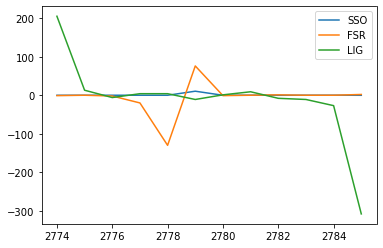

In [49]:
difference_df.iloc[2773:2785, :3].plot()
difference_df.iloc[2773:2785, :2].mean()

### 아래는 랜덤으로 잡은 인덱스 (보관함을 조종하고있지 않은 상태)

- 값의 변화가 매우 작은 것을 확인할 수 있다

SSO   -0.0025
FSR   -0.0250
dtype: float64

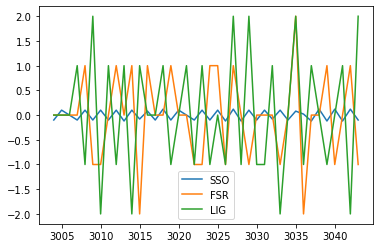

In [50]:
difference_df.iloc[3003:3043, :3].plot()
difference_df.iloc[3003:3043, :2].mean()


In [40]:
for i in range(len(open_list)):
    start, end = open_list[i], closed_list[i]
    sso, fsr = difference_df.iloc[start:end, :2].mean()
    # threshold: 조도센서의 차가 +100이 날 때를 기준으로 + 40만큼의 행들의 센서별 평균값이 0.1 이상 차이나는 경우
    if sso > 0.1 and fsr < -0.1:
        print("물건을 가져갔습니다. : 이용자(고객)")
    elif sso < -0.1 and fsr > 0.1:
        print("물건을 넣었습니다. : 집배원")
    else:
        print(f"UNKNOWN DATA, Index = {index}, sso = {sso}, fsr = {fsr}")


물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
UNKNOWN DATA, Index = 12004, sso = -0.0864285714285715, fsr = -0.5
UNKNOWN DATA, Index = 12004, sso = -0.09319999999999994, fsr = 2.56
물건을 가져갔습니다. : 이용자(고객)
물건을 넣었습니다. : 집배원
물건을 가져갔습니다. : 이용자(고객)
